### Data load & Preprocessing

In [2]:
import pandas as pd

train_df = pd.read_csv('./train.csv') 
test_df = pd.read_csv('./test.csv')
build_df = pd.read_csv('./building_info.csv')

In [3]:
# 불쾌지수=1.8x기온–0.55x(1–습도)x(1.8x기온–26)+32
# 체감온도 = 13.12 + 0.6215*기온 - 11.37*풍속^0.16 +0.3965^0.16*기온 (풍속 단위 = km/h 이므로 현재 데이터에선 변환 필요)

In [4]:
print(train_df.columns)
print(test_df.columns)
print(build_df.columns)

Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)'],
      dtype='object')
Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)'], dtype='object')
Index(['건물번호', '건물유형', '연면적(m2)', '냉방면적(m2)', '태양광용량(kW)', 'ESS저장용량(kWh)',
       'PCS용량(kW)'],
      dtype='object')


In [5]:
build_df.drop(columns = ['연면적(m2)', '냉방면적(m2)', '태양광용량(kW)', 'ESS저장용량(kWh)',
       'PCS용량(kW)'],inplace= True)
build_df.columns = ['build_num', 'type']
type_list = ['etc','public','university','data center','outlet','hospital','commerse','apt','lab','knowledge center','mart','hotel']

i = 0
for t in build_df['type'].unique():
    idx = build_df[build_df['type'] == t].index
    build_df['type'].iloc[idx] = type_list[i]
    i += 1
build_df

/tmp/ipykernel_690248/1997782248.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build_df['type'].iloc[idx] = type_list[i]
/tmp/ipykernel_690248/1997782248.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build_df['type'].iloc[idx] = type_list[i]
/tmp/ipykernel_690248/1997782248.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build_df['type'].iloc[idx] = type_list[i]
/tmp/ipykernel_690248/1997782248.py:9: SettingWithCopyWarn

,build_num,type
0,1,etc
1,2,etc
2,3,etc
3,4,etc
4,5,etc
...,...,...
95,96,hotel
96,97,hotel
97,98,hotel
98,99,hotel


In [6]:
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [7]:
test_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


In [8]:
train_df.drop(columns = ['num_date_time','일조(hr)','일사(MJ/m2)'], inplace = True)
test_df.drop(columns = ['num_date_time'], inplace = True)

In [9]:
print(train_df.columns)
print(test_df.columns)

Index(['건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '전력소비량(kWh)'], dtype='object')
Index(['건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)'], dtype='object')


In [10]:
# column 명 변경
train_df.columns = ['build_num','datetime','temp','rain','wind','humid','electric']
test_df.columns = ['build_num','datetime','temp','rain','wind','humid']

In [11]:
# 시간 분할 후 datetime drop
train_df['month']= pd.DatetimeIndex(train_df['datetime']).month
train_df['week'] = pd.DatetimeIndex(train_df['datetime']).weekday
train_df['day'] = pd.DatetimeIndex(train_df['datetime']).day
train_df['time']= pd.DatetimeIndex(train_df['datetime']).hour

test_df['month']= pd.DatetimeIndex(test_df['datetime']).month
test_df['week'] = pd.DatetimeIndex(test_df['datetime']).weekday
test_df['day'] = pd.DatetimeIndex(test_df['datetime']).day
test_df['time']= pd.DatetimeIndex(test_df['datetime']).hour

train_df.drop(columns=['datetime'], axis = 1,inplace = True)
test_df.drop(columns=['datetime'], axis = 1,inplace = True)

In [12]:
# 주말 추가 
train_df['holiday'] = [1 if w > 4 else 0 for w in train_df['week']] 
test_df['holiday'] = [1 if w > 4 else 0 for w in test_df['week']]

# 6월6일 현충일 & 8월 15일 광복절 반영 (공휴일)
idx = train_df[(train_df['month'] == 6) & (train_df['day'] == 6)].index
train_df['holiday'].iloc[idx] = 1

idx = train_df[(train_df['month'] == 8) & (train_df['day'] == 15)].index
train_df['holiday'].iloc[idx] = 1

/tmp/ipykernel_690248/45301314.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['holiday'].iloc[idx] = 1
/tmp/ipykernel_690248/45301314.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['holiday'].iloc[idx] = 1


In [13]:
# Null 값 확인
train_df.isnull().sum()

build_num         0
temp              0
rain         160069
wind             19
humid             9
electric          0
month             0
week              0
day               0
time              0
holiday           0
dtype: int64

In [14]:
# rain은 전부 0 / wind, humid는 직전 앞 뒤값 평균
train_df['rain'].fillna(0,inplace=True)
train_df['wind'] = train_df['wind'].fillna(train_df['wind'].interpolate())
train_df['humid'] = train_df['humid'].fillna(train_df['humid'].interpolate())

In [15]:
# Null 값 확인
train_df.isnull().sum()

build_num    0
temp         0
rain         0
wind         0
humid        0
electric     0
month        0
week         0
day          0
time         0
holiday      0
dtype: int64

In [16]:
# 불쾌지수 추가
# 공식: 불쾌지수=1.8x기온–0.55x(1–습도)x(1.8x기온–26)+32
train_df['discomfort_idx'] = 1.8 * train_df['temp'] - 0.55*(1-train_df['humid'])*(1.8* train_df['temp']-26 )+32
test_df['discomfort_idx'] = 1.8 * test_df['temp'] - 0.55*(1-test_df['humid'])*(1.8* test_df['temp']-26 )+32

In [17]:
# 체감온도 추가
# 공식: 체감온도 = 13.12 + 0.6215*기온 - 11.37*풍속^0.16 +0.3965^0.16*기온 (풍속 단위 = km/h 이므로 현재 데이터에선 추가로 *3.6 변환 필요)
train_df['sensory_temp'] = 13.12 + 0.6215*train_df['temp'] - 11.37*(train_df['wind'] * 3.6)**(0.16) + (0.3965)*train_df['temp']*(train_df['wind'] * 3.6)**(0.16)
test_df['sensory_temp'] = 13.12 + 0.6215*test_df['temp'] - 11.37*(test_df['wind'] * 3.6)**(0.16) + (0.3965)*test_df['temp']*(test_df['wind'] * 3.6)**(0.16)


In [18]:
train_df

,build_num,temp,rain,wind,humid,electric,month,week,day,time,holiday,discomfort_idx,sensory_temp
0,1,18.6,0.0,0.9,42.0,1085.28,6,2,1,0,0,234.154,19.858037
1,1,18.0,0.0,1.1,45.0,1047.36,6,2,1,1,0,219.280,19.031307
2,1,17.7,0.0,1.5,45.0,974.88,6,2,1,2,0,205.672,18.420654
3,1,16.7,0.0,1.4,48.0,953.76,6,2,1,3,0,167.011,17.348120
4,1,18.4,0.0,2.8,43.0,986.40,6,2,1,4,0,229.592,18.658787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,23.1,0.0,0.9,86.0,881.04,8,2,24,19,0,801.945,24.808277
203996,100,22.4,0.0,1.3,86.0,798.96,8,2,24,20,0,741.780,23.856233
203997,100,21.3,0.0,1.0,92.0,825.12,8,2,24,21,0,687.957,22.768173
203998,100,21.0,0.0,0.3,94.0,640.08,8,2,24,22,0,673.370,23.090291


In [19]:
train_df = pd.merge(train_df,build_df)
test_df = pd.merge(test_df,build_df)

In [20]:
train_df = pd.get_dummies(data = train_df, columns =['type'], dtype=float)
test_df = pd.get_dummies(data = test_df, columns =['type'], dtype=float)

In [21]:
train_df.head()

,build_num,temp,rain,wind,humid,electric,month,week,day,time,...,type_data center,type_etc,type_hospital,type_hotel,type_knowledge center,type_lab,type_mart,type_outlet,type_public,type_university
0,1,18.6,0.0,0.9,42.0,1085.28,6,2,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,18.0,0.0,1.1,45.0,1047.36,6,2,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,17.7,0.0,1.5,45.0,974.88,6,2,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,16.7,0.0,1.4,48.0,953.76,6,2,1,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,18.4,0.0,2.8,43.0,986.40,6,2,1,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# y 값인 electric이 가장 뒤로가도록 순서 변경
df = train_df[['build_num', 'temp', 'rain', 'wind', 'humid', 'month',
       'week', 'day', 'time', 'holiday', 'discomfort_idx', 'sensory_temp',
       'type_apt', 'type_commerse', 'type_data center', 'type_etc',
       'type_hospital', 'type_hotel', 'type_knowledge center', 'type_lab',
       'type_mart', 'type_outlet', 'type_public', 'type_university', 'electric']]
df

,build_num,temp,rain,wind,humid,month,week,day,time,holiday,...,type_etc,type_hospital,type_hotel,type_knowledge center,type_lab,type_mart,type_outlet,type_public,type_university,electric
0,1,18.6,0.0,0.9,42.0,6,2,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1085.28
1,1,18.0,0.0,1.1,45.0,6,2,1,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1047.36
2,1,17.7,0.0,1.5,45.0,6,2,1,2,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,974.88
3,1,16.7,0.0,1.4,48.0,6,2,1,3,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,953.76
4,1,18.4,0.0,2.8,43.0,6,2,1,4,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,986.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,23.1,0.0,0.9,86.0,8,2,24,19,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,881.04
203996,100,22.4,0.0,1.3,86.0,8,2,24,20,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,798.96
203997,100,21.3,0.0,1.0,92.0,8,2,24,21,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,825.12
203998,100,21.0,0.0,0.3,94.0,8,2,24,22,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,640.08


In [23]:
test_df

,build_num,temp,rain,wind,humid,month,week,day,time,holiday,...,type_data center,type_etc,type_hospital,type_hotel,type_knowledge center,type_lab,type_mart,type_outlet,type_public,type_university
0,1,23.5,0.0,2.2,72,8,3,25,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,23.0,0.0,0.9,72,8,3,25,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,22.7,0.0,1.5,75,8,3,25,2,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,22.1,0.0,1.3,78,8,3,25,3,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,21.8,0.0,1.0,77,8,3,25,4,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,22.5,0.0,0.9,84,8,2,31,19,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16796,100,20.7,0.0,0.4,95,8,2,31,20,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16797,100,20.2,0.0,0.4,98,8,2,31,21,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16798,100,20.1,0.0,1.1,97,8,2,31,22,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
sample_df = pd.read_csv('sample_submission.csv')

### EDA

- 각 요소별로 EDA 통해 전체적인 데이터 경향성 파악
- 전력 소모량과 데이터 간의 값차이 크므로 정규화하여 비교 진행

<BarContainer object of 3 artists>

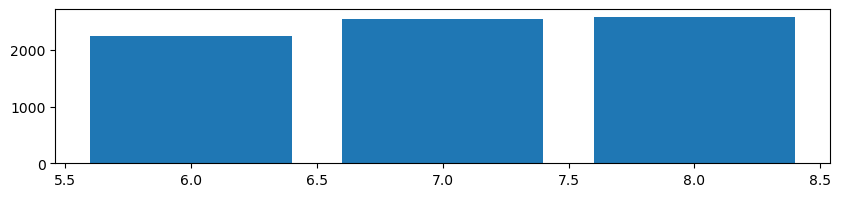

In [25]:
# 월별 전력사용량
import matplotlib.pyplot as plt
plt.figure(figsize = (10,2))
mean_elec = df.groupby('month').electric.mean()
plt.bar(df['month'].unique(),mean_elec)

<BarContainer object of 7 artists>

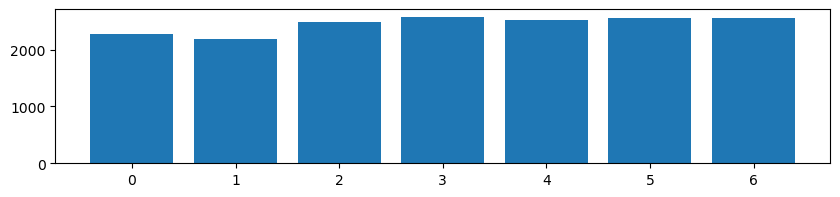

In [26]:
# 요일별 전력사용량
plt.figure(figsize = (10,2))
mean_elec = df.groupby('week').electric.mean()
plt.bar(df['week'].unique(),mean_elec)

<BarContainer object of 24 artists>

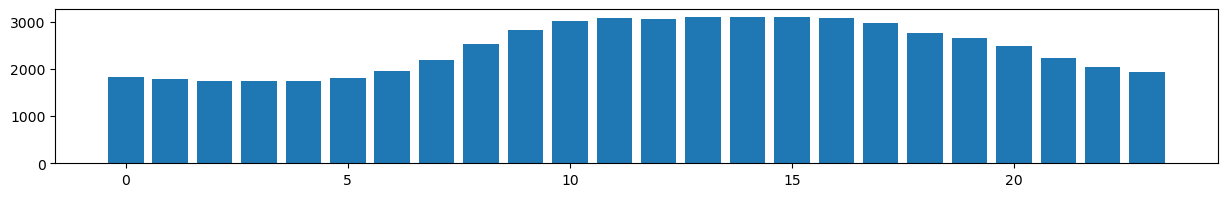

In [27]:
# 시간대 별 전력사용량
plt.figure(figsize = (15,2))
mean_elec = df.groupby('time').electric.mean()
plt.bar(df['time'].unique(),mean_elec)

<BarContainer object of 100 artists>

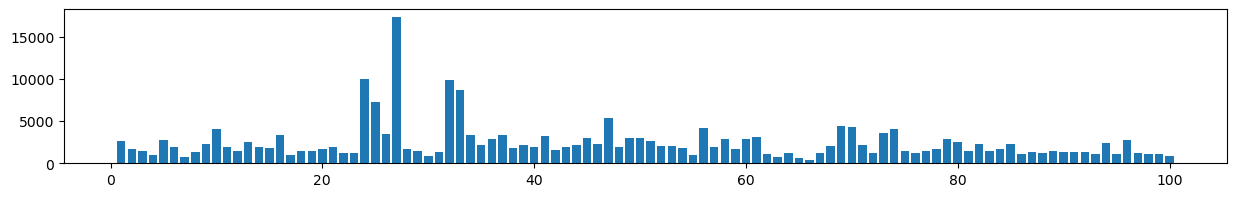

In [28]:
# 건물 종류에 따른 전력사용량
plt.figure(figsize = (15,2))
mean_elec = df.groupby('build_num').electric.mean()
plt.bar(df['build_num'].unique(),mean_elec)

In [29]:
# # 건물 면적과 종류 사이의 전력 사용량 상관관계
# plt.figure(figsize = (15,2))
# mean_area = df.groupby('type').gross_area.mean()
# plt.bar(df['type'].unique(),mean_area)

In [30]:
# # ess존재 여부에 따른 전력 사용량 비교
# print(df[(df['ess_capa'] > 0)]['electric'].mean()) 
# df[(df['ess_capa'] == 0)]['electric'].mean() 

In [31]:
# # Lasso regression 으로 유의미한 변수 선택 - > 시계열 신경없이 돌리기
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error
# import numpy as np

# lasso_df = df.copy()
# x = lasso_df.drop(['type','datetime','electric'], axis = 1)
# y = lasso_df['electric']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21)

# # 데이터 스케일링
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# # Lasso 회귀 모델 생성
# alpha = 50  # L1 규제 강도를 조절하는 하이퍼파라미터
# lasso_model = Lasso(alpha=alpha)

# # 모델 훈련
# lasso_model.fit(x_train_scaled, y_train)

# # 예측
# y_pred = lasso_model.predict(x_test_scaled)

# # 평가
# smape = smape(y_test, y_pred)
# print(f"SMAPE: {smape}")

# # 선택된 특성의 계수 출력
# selected_features = lasso_df.columns[np.where(lasso_model.coef_ != 0)[0]]
# print("Selected features:", selected_features)

# # 탈락된 계수 출력
# dropped_features = lasso_df.columns[np.where(lasso_model.coef_ == 0)[0]]
# print("Dropped features:", dropped_features)


### Modeling

- non-linear 한 경향성 보일 것이기 때문에 non-linear 회귀 중 모델 선택
- 시계열 데이터의 seasonality 반영 위한 방법 탐구 필요
- Lasso regression을 통해 유의미한 변수 선택하여 돌려보는 것도 필요할 것 같다!

In [32]:
df.columns

Index(['build_num', 'temp', 'rain', 'wind', 'humid', 'month', 'week', 'day',
       'time', 'holiday', 'discomfort_idx', 'sensory_temp', 'type_apt',
       'type_commerse', 'type_data center', 'type_etc', 'type_hospital',
       'type_hotel', 'type_knowledge center', 'type_lab', 'type_mart',
       'type_outlet', 'type_public', 'type_university', 'electric'],
      dtype='object')

In [35]:
# LightGBM 모델 돌려보기

def smape(y_true, y_pred):
    num = np.abs((y_true) - (y_pred))
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(num / denom) * 100 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMRegressor

light_df = df.copy()

x = light_df.drop(['electric'], axis = 1)
y = light_df['electric']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=23)

# LightGBM 모델 생성
para = {'learning_rate': 0.1, 
          'max_depth': 16, 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144,  
          'seed':2018}

# define metric function

model = LGBMRegressor(**para,n_estimators=500, verbose=-1)

# 모델 훈련
model.fit(x_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(x_valid)

smape_score = smape(y_valid, y_pred)
print("SMAPE score:", smape_score)

SMAPE score: 5.684047611563108


In [36]:
# LightGBM 모델 - 건물번호별로 별도로 진행

def smape(y_true, y_pred):
    num = np.abs((y_true) - (y_pred))
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(num / denom) * 100 

def validate_multi(valid_x, valid_y, models):
    preds = []
    for i in range(1,len(df['build_num'].unique())+1):
        _x = valid_x[valid_x['build_num'] == i]
        pred = models[i].predict(_x).tolist()
        preds.extend(pred)
    preds = np.array(preds)
    smape_score= smape(y_valid, y_pred)
    return smape_score

def train_multiple_models(x_train, y_train, n_estimators=500):
    models = {}
    for i in range(1,len(df['build_num'].unique())+1):
        x_model = x_train[x_train['build_num'] == i]
        y_model = y_train[x_model.index]
        model_lgb = lgb.LGBMRegressor(objective='regression', n_estimators=n_estimators, verbose=-1)
        model_lgb.fit(x_model, y_model)
        models[i] = model_lgb
        print(models)
    return models


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from lightgbm import LGBMRegressor

light_df = df.copy()

x = light_df.drop(['electric'], axis = 1)
y = light_df['electric']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=23)

# LightGBM 모델 생성
# para = {'learning_rate': 0.01, 
#           'max_depth': 16, 
#           'boosting': 'gbdt', 
#           'objective': 'regression', 
#           'metric': 'mse', 
#           'is_training_metric': True, 
#           'num_leaves': 144, 
#           'feature_fraction': 0.9, 
#           'bagging_fraction': 0.7, 
#           'bagging_freq': 5, 
#           'seed':2018}

# # define metric function

# model2 = LGBMRegressor(objective='regression', n_estimators=300, verbose=-1)

# # 모델 훈련
# model2.fit(x_train, y_train)

# # 테스트 데이터 예측
# y_pred = model2.predict(x_valid)

# smape_score = smape(y_valid, y_pred)
# print("SMAPE score:", smape_score)

model2 = train_multiple_models(x_train, y_train)

smape_score = validate_multi(x_valid, y_valid, model2)
print(f'SMAPE: {smape_score}')

{1: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1)}
{1: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1), 2: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1)}
{1: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1), 2: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1), 3: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1)}
{1: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1), 2: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1), 3: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1), 4: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1)}
{1: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1), 2: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1), 3: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1), 4: LGBMRegressor(n_estimators=500, objective='regression', 

In [37]:
# # 건물 구분x
# answer = model.predict(test_df)
# sample_df['answer'] = answer
# sample_df

AttributeError: 'dict' object has no attribute 'predict'

In [39]:
test_df

,build_num,temp,rain,wind,humid,month,week,day,time,holiday,...,type_data center,type_etc,type_hospital,type_hotel,type_knowledge center,type_lab,type_mart,type_outlet,type_public,type_university
0,1,23.5,0.0,2.2,72,8,3,25,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,23.0,0.0,0.9,72,8,3,25,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,22.7,0.0,1.5,75,8,3,25,2,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,22.1,0.0,1.3,78,8,3,25,3,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,21.8,0.0,1.0,77,8,3,25,4,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,22.5,0.0,0.9,84,8,2,31,19,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16796,100,20.7,0.0,0.4,95,8,2,31,20,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16797,100,20.2,0.0,0.4,98,8,2,31,21,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16798,100,20.1,0.0,1.1,97,8,2,31,22,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
model2

{1: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 2: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 3: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 4: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 5: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 6: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 7: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 8: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 9: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 10: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 11: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 12: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 13: LGBMRegressor(n_estimators=500, objective='regression', verbose=-1),
 14: LGBMRegressor(n_estimators=500, objective=

In [43]:
# 건물 구분o
preds = []
for i in range(1,len(df['build_num'].unique())+1):
    _x = test_df[test_df['build_num'] == i]
    pred = model2[i].predict(_x).tolist()
    preds.extend(pred)
preds = np.array(preds)
answer = preds
answer
# answer = model.predict(test_df)
sample_df['answer'] = answer
sample_df

,num_date_time,answer
0,1_20220825 00,2081.745310
1,1_20220825 01,2098.289760
2,1_20220825 02,1974.950450
3,1_20220825 03,1942.506825
4,1_20220825 04,1966.924348
...,...,...
16795,100_20220831 19,865.559403
16796,100_20220831 20,783.633917
16797,100_20220831 21,681.887154
16798,100_20220831 22,613.003345


In [44]:
sample_df.to_csv('third_submission.csv', index=False)